In [29]:
import pandas as pd
import sklearn.metrics as skm
from matplotlib import pyplot as plt

In [30]:
new_clustering = pd.read_csv('../../data_tables/clustering_labels/GSM699_cluster_Sep_23_2022.bestclus.remapped.txt',
                            sep='\t', index_col=0)

new_clustering

,cluster,silhouetteValue,unmapped_cluster
SampleName,,,
DLBCL11470,1,0.091243,1
DLBCL_LS3809,1,0.133936,1
DLBCL10969,1,0.150620,1
DLBCL11454,1,0.210921,1
DLBCL11520,1,0.050706,1
...,...,...,...
DLBCL_LS2596,5,0.091813,2
DLBCL11595,5,0.086577,2
DLBCL10992,5,0.057065,2


In [32]:
old_clustering = pd.read_csv('../../data_tables/clustering_labels/GSM699_cluster_Aug_17_2022.bestclus.remapped.txt',
                            sep='\t', index_col=0)
old_clustering = old_clustering.loc[new_clustering.index]
old_clustering

,cluster,silhouetteValue,unmapped_cluster
SampleName,,,
DLBCL11470,1,0.096517,3
DLBCL_LS3809,1,0.063752,3
DLBCL10969,1,-0.064765,3
DLBCL11454,1,0.037945,3
DLBCL11520,1,0.049583,3
...,...,...,...
DLBCL_LS2596,5,0.018162,2
DLBCL11595,5,0.060792,2
DLBCL10992,5,0.001708,2


In [33]:
skm.confusion_matrix(old_clustering['cluster'], new_clustering['cluster'])

array([[138,   1,   0,   2,   0],
       [  0, 167,   0,   0,   1],
       [  1,   2, 116,   0,   0],
       [  1,   1,   1,  94,   3],
       [  0,   0,   0,   1, 170]])

In [34]:
new_clustering['old_cluster'] = old_clustering['cluster']
diffs = new_clustering.loc[new_clustering['cluster'] != new_clustering['old_cluster']]
diffs.shape

(14, 4)

In [35]:
diffs

,cluster,silhouetteValue,unmapped_cluster,old_cluster
SampleName,,,,
DFCIDL001_DT,1,0.216011,1,3
DLBCL_LS3866,1,0.034242,1,4
DLBCL10894,2,0.010465,4,1
DLBCL_RICOVER_208,2,0.089121,4,3
DLBCL_BWH_DLBCL64,2,0.018395,4,4
DLBCL10549,2,-0.075055,4,3
DLBCL11455,3,0.084751,3,4
DLBCL_RICOVER_1204,4,-0.046499,5,5
DLBCL10478,4,0.019853,5,1


In [37]:
confidences = pd.read_csv('../../data_tables/confidence_tables/baseline_probabilities.connectivity_based.sensitivity_power2.Sep_23_2022.tsv',
                         sep='\t', index_col=0)
diff_c = confidences.loc[diffs.index]
diff_c

,C1,C2,C3,C4,C5,cluster,confidence
SampleName,,,,,,,
DFCIDL001_DT,0.971748,0.000758,0.005758,0.021631,0.000105,1,0.971748
DLBCL_LS3866,0.507257,0.000643,0.000805,0.490056,0.001240,1,0.507257
DLBCL10894,0.484250,0.503958,0.001840,0.008499,0.001453,2,0.503958
DLBCL_RICOVER_208,0.000123,0.515922,0.481106,0.001475,0.001374,2,0.515922
DLBCL_BWH_DLBCL64,0.080552,0.583433,0.004453,0.330711,0.000852,2,0.583433
DLBCL10549,0.000165,0.828212,0.168989,0.001542,0.001093,2,0.828212
DLBCL11455,0.014204,0.001211,0.523492,0.460868,0.000225,3,0.523492
DLBCL_RICOVER_1204,0.003329,0.004127,0.001044,0.505696,0.485804,4,0.505696
DLBCL10478,0.402608,0.001192,0.133626,0.462173,0.000401,4,0.462173


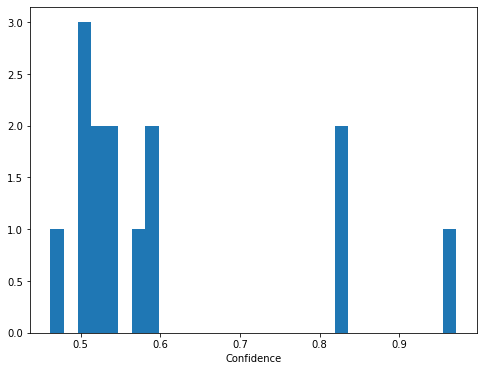

In [38]:
plt.figure(figsize=(8,6))
plt.hist(diff_c['confidence'], bins=30)
plt.xlabel('Confidence')
plt.show()